####Importing all the required libraries

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

####Reading the data file

In [162]:
dataset = pd.read_csv('PercentFeature.csv')
df = pd.DataFrame(dataset)
columns = df.columns.tolist()
for i in range(1,len(columns)):
  columns[i] = columns[i].split('1np_')[1].split('.')[0]
columns[0] ='NP'
df.columns = columns
df = df.T
df.columns = df.iloc[0]
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)
cols = df.columns
df

NP,CHD2,CTCF-7BWu,enhancer,EP300,h3k27me3,H3K36me3,H3K9me3,MAFK,med12,4-Oct,RNAPII-s2p,RNAPII-S5p,RNAPII-S7p,Sox2,Tcf3,ZC3H11A,ZNF384,Cluster
f10a2,0.067043,0.39774,0.263842,0.208851,0.105085,0.223917,0.155556,0.164783,0.062712,0.212994,0.198682,0.377966,0.319021,0.148776,0.062335,0.236535,0.242561,0.0
f10a3,0.066978,0.415567,0.290797,0.227493,0.113412,0.243194,0.157675,0.174378,0.072824,0.223317,0.21697,0.392016,0.334224,0.168365,0.061132,0.24787,0.260732,0.0
f10a4,0.076307,0.454091,0.316738,0.245434,0.12059,0.258944,0.148862,0.17313,0.067551,0.222917,0.251689,0.415311,0.372029,0.158869,0.059545,0.244684,0.275206,0.0
f10a5,0.064214,0.384975,0.273067,0.216958,0.101933,0.247506,0.165835,0.154613,0.073566,0.23192,0.224751,0.390274,0.349127,0.158666,0.065461,0.216958,0.228491,1.0
f10a6,0.04898,0.35102,0.227211,0.167347,0.095238,0.155102,0.171429,0.127891,0.051701,0.2,0.140136,0.333333,0.292517,0.118367,0.051701,0.2,0.195918,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f9g1,0.063757,0.400196,0.259931,0.198627,0.11182,0.232467,0.158411,0.166258,0.062285,0.210397,0.228053,0.398725,0.336439,0.153016,0.059833,0.230505,0.244237,1.0
f9g2,0.067926,0.40888,0.294897,0.224652,0.110007,0.246521,0.153082,0.170974,0.0666,0.232936,0.223658,0.384692,0.327369,0.160702,0.063618,0.232936,0.245195,1.0
f9g3,0.076947,0.414573,0.321922,0.253141,0.112751,0.267274,0.144786,0.177764,0.084171,0.252827,0.260678,0.428078,0.378769,0.179334,0.071608,0.236809,0.275126,1.0
f9g4,0.087297,0.479015,0.34751,0.261332,0.120313,0.242865,0.128707,0.184107,0.062115,0.241746,0.247342,0.434807,0.364857,0.179631,0.059877,0.281477,0.287633,1.0


####Splitting the data into train and test data

In [163]:
X =df.drop(['Cluster'], axis = 1)
y = df['Cluster']
y=y.astype('int')
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#CART Classification Feature Importance



In [164]:
from sklearn.tree import DecisionTreeClassifier
dict = {}
dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train, y_train)
# get importance
importance = dtc.feature_importances_

imp = np.array(importance)
kc = np.array(cols)
d = {}
for A, B in zip(kc, imp):
    d[A] = B
d
sorted_values = sorted(d.values(),reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in d.keys():
        if d[k] == i:
            sorted_dict[k] = d[k]
            break

#print(sorted_dict)
df2 = pd.DataFrame([sorted_dict])
df2 = df2.T
df2
#df2.describe()

,0
H3K9me3,0.093340
CHD2,0.078977
4-Oct,0.078867
MAFK,0.074092
RNAPII-S7p,0.073553
Tcf3,0.071143
EP300,0.065105
Sox2,0.064667
RNAPII-S5p,0.055052
h3k27me3,0.052805


####Generate a list of most important features which have score above threshold

In [165]:
#threshold value for the selection is the mean of all scores
selection = SelectFromModel(dtc, threshold=0.058824)
selection.fit(X_train, y_train)
features = cols.tolist()
print('\nList of important features obtained using CART Classification Feature Importance\n')
for index in selection.get_support(indices=True):
		print(f" {features[index]}")


List of important features obtained using CART Classification Feature Importance

 CHD2
 h3k27me3
 H3K9me3
 4-Oct
 RNAPII-S5p
 Sox2
 Tcf3


####Predict the clusters in test samples by using the important features 

In [166]:
select_X_train = selection.transform(X_train)
# train model
selection_model = DecisionTreeClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)

train_predictions = dtc.predict(X_train)
FINAL_predictions = dtc.predict(X)
new_data = df
new_data['predicted'] = FINAL_predictions
new_data

NP,CHD2,CTCF-7BWu,enhancer,EP300,h3k27me3,H3K36me3,H3K9me3,MAFK,med12,4-Oct,RNAPII-s2p,RNAPII-S5p,RNAPII-S7p,Sox2,Tcf3,ZC3H11A,ZNF384,Cluster,predicted
f10a2,0.067043,0.39774,0.263842,0.208851,0.105085,0.223917,0.155556,0.164783,0.062712,0.212994,0.198682,0.377966,0.319021,0.148776,0.062335,0.236535,0.242561,0.0,0
f10a3,0.066978,0.415567,0.290797,0.227493,0.113412,0.243194,0.157675,0.174378,0.072824,0.223317,0.21697,0.392016,0.334224,0.168365,0.061132,0.24787,0.260732,0.0,0
f10a4,0.076307,0.454091,0.316738,0.245434,0.12059,0.258944,0.148862,0.17313,0.067551,0.222917,0.251689,0.415311,0.372029,0.158869,0.059545,0.244684,0.275206,0.0,0
f10a5,0.064214,0.384975,0.273067,0.216958,0.101933,0.247506,0.165835,0.154613,0.073566,0.23192,0.224751,0.390274,0.349127,0.158666,0.065461,0.216958,0.228491,1.0,1
f10a6,0.04898,0.35102,0.227211,0.167347,0.095238,0.155102,0.171429,0.127891,0.051701,0.2,0.140136,0.333333,0.292517,0.118367,0.051701,0.2,0.195918,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f9g1,0.063757,0.400196,0.259931,0.198627,0.11182,0.232467,0.158411,0.166258,0.062285,0.210397,0.228053,0.398725,0.336439,0.153016,0.059833,0.230505,0.244237,1.0,1
f9g2,0.067926,0.40888,0.294897,0.224652,0.110007,0.246521,0.153082,0.170974,0.0666,0.232936,0.223658,0.384692,0.327369,0.160702,0.063618,0.232936,0.245195,1.0,1
f9g3,0.076947,0.414573,0.321922,0.253141,0.112751,0.267274,0.144786,0.177764,0.084171,0.252827,0.260678,0.428078,0.378769,0.179334,0.071608,0.236809,0.275126,1.0,1
f9g4,0.087297,0.479015,0.34751,0.261332,0.120313,0.242865,0.128707,0.184107,0.062115,0.241746,0.247342,0.434807,0.364857,0.179631,0.059877,0.281477,0.287633,1.0,1


####Accuracy of the predictions made

In [167]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 18.56%


#XGBoost Classification Feature Importance

In [168]:
pip install xgboost

In [169]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
# fit the model
xgbc.fit(X_train, y_train)
# get importance
importance_X = xgbc.feature_importances_
impX = np.array(importance_X)
kcX = np.array(cols)
dX = {}
for A, B in zip(kcX, impX):
    dX[A] = B
dX
sorted_values_X = sorted(dX.values(),reverse=True) # Sort the values
sorted_dict_X = {}

for i in sorted_values_X:
    for k in dX.keys():
        if dX[k] == i:
            sorted_dict_X[k] = dX[k]
            break
            
#print(sorted_dict)
df2X = pd.DataFrame([sorted_dict_X])
df2X = df2X.T
df2X
#df2X.describe()

,0
ZNF384,0.070913
CHD2,0.064691
4-Oct,0.063826
RNAPII-S5p,0.062356
ZC3H11A,0.061554
Sox2,0.061502
RNAPII-s2p,0.059998
MAFK,0.059802
EP300,0.059142
RNAPII-S7p,0.057271


####Generate a list of most important features which have score above threshold

In [170]:
selection = SelectFromModel(xgbc, threshold=0.058824)
selection.fit(X_train, y_train)
features = cols.tolist()
print('\nList of important features obtained using XGBoost classifier\n')
for index in selection.get_support(indices=True):
		print(f" {features[index]}")


List of important features obtained using XGBoost classifier

 CHD2
 EP300
 MAFK
 4-Oct
 RNAPII-s2p
 RNAPII-S5p
 Sox2
 ZC3H11A
 ZNF384


####Predict the clusters in test samples by using the important features 

In [171]:
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)

train_predictions = xgbc.predict(X_train)
FINAL_predictions = xgbc.predict(X)
new_data = df
new_data['predicted'] = FINAL_predictions
new_data.head(10)

NP,CHD2,CTCF-7BWu,enhancer,EP300,h3k27me3,H3K36me3,H3K9me3,MAFK,med12,4-Oct,RNAPII-s2p,RNAPII-S5p,RNAPII-S7p,Sox2,Tcf3,ZC3H11A,ZNF384,Cluster,predicted
f10a2,0.067043,0.39774,0.263842,0.208851,0.105085,0.223917,0.155556,0.164783,0.062712,0.212994,0.198682,0.377966,0.319021,0.148776,0.062335,0.236535,0.242561,0.0,0
f10a3,0.066978,0.415567,0.290797,0.227493,0.113412,0.243194,0.157675,0.174378,0.072824,0.223317,0.21697,0.392016,0.334224,0.168365,0.061132,0.24787,0.260732,0.0,0
f10a4,0.076307,0.454091,0.316738,0.245434,0.12059,0.258944,0.148862,0.17313,0.067551,0.222917,0.251689,0.415311,0.372029,0.158869,0.059545,0.244684,0.275206,0.0,0
f10a5,0.064214,0.384975,0.273067,0.216958,0.101933,0.247506,0.165835,0.154613,0.073566,0.23192,0.224751,0.390274,0.349127,0.158666,0.065461,0.216958,0.228491,1.0,1
f10a6,0.04898,0.35102,0.227211,0.167347,0.095238,0.155102,0.171429,0.127891,0.051701,0.2,0.140136,0.333333,0.292517,0.118367,0.051701,0.2,0.195918,1.0,1
f10b1,0.058824,0.319328,0.151261,0.159664,0.079832,0.189076,0.180672,0.142857,0.037815,0.159664,0.147059,0.302521,0.268908,0.12605,0.07563,0.176471,0.222689,1.0,1
f10b2,0.079781,0.436204,0.314084,0.246256,0.12068,0.262529,0.141849,0.170075,0.068548,0.22307,0.24496,0.404666,0.34951,0.158554,0.061492,0.254752,0.260945,1.0,7
f10b3,0.074138,0.418334,0.298075,0.235563,0.125214,0.254812,0.151325,0.169621,0.070135,0.221269,0.233086,0.410711,0.35163,0.153993,0.062702,0.241471,0.270059,1.0,1
f10b4,0.063525,0.393127,0.252799,0.203853,0.095288,0.21661,0.161677,0.160375,0.062744,0.202551,0.195782,0.361364,0.317365,0.147097,0.054153,0.228586,0.236397,2.0,7
f10b5,0.057282,0.358927,0.256348,0.193581,0.093236,0.204956,0.148893,0.152549,0.070079,0.209628,0.174893,0.353646,0.302255,0.152956,0.057688,0.21105,0.231566,2.0,2


####Accuracy of the predictions made

In [172]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 20.62%


Visualizing scores for CART and XGBoost Classification Feature Importance

In [173]:
feat = d.keys()
decT = d.values()
Xboost = dX.values()

In [174]:
arr = np.array([list(feat),list(decT),list(Xboost)])
df = pd.DataFrame(arr)
df = df.T
df.columns = ['Feature Name','DTC','XGBoost']
df.head(20)

,Feature Name,DTC,XGBoost
0,CHD2,0.07897671035130355,0.06469124
1,CTCF-7BWu,0.03421742575742992,0.052523956
2,enhancer,0.019558636937605414,0.056914736
3,EP300,0.06510485943036044,0.05914221
4,h3k27me3,0.05280499294559436,0.054682165
5,H3K36me3,0.05216253590522892,0.054943785
6,H3K9me3,0.09334008046429225,0.0504713
7,MAFK,0.07409200215116381,0.059802026
8,med12,0.04430632553319133,0.054932468
9,4-Oct,0.07886663737656614,0.06382588


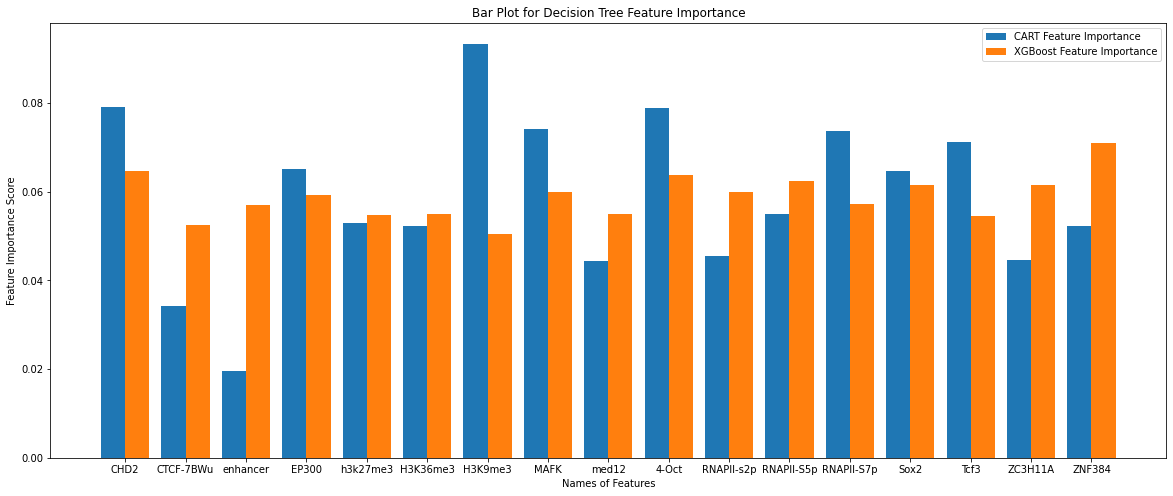

In [175]:
X_axis = np.arange(len(feat))

plt.rcParams['figure.figsize'] = [20, 8]

plt.bar(X_axis - 0.2, decT, 0.4, label = 'CART Feature Importance')
plt.bar(X_axis + 0.2, Xboost, 0.4, label = 'XGBoost Feature Importance')
  
plt.xticks(X_axis, feat)
plt.xlabel("Names of Features")
plt.ylabel("Feature Importance Score")
plt.title("Bar Plot for Decision Tree Feature Importance")
plt.legend()
plt.show()